=== VÍ DỤ 1: KNN CLASSIFICATION ===
Số mẫu dữ liệu: 500
Số đặc trưng: 2
Số lớp: 3
Phân bố các lớp: [166 167 167]

Số mẫu train: 350
Số mẫu test: 150

K tối ưu: 3
Độ chính xác tốt nhất: 0.953


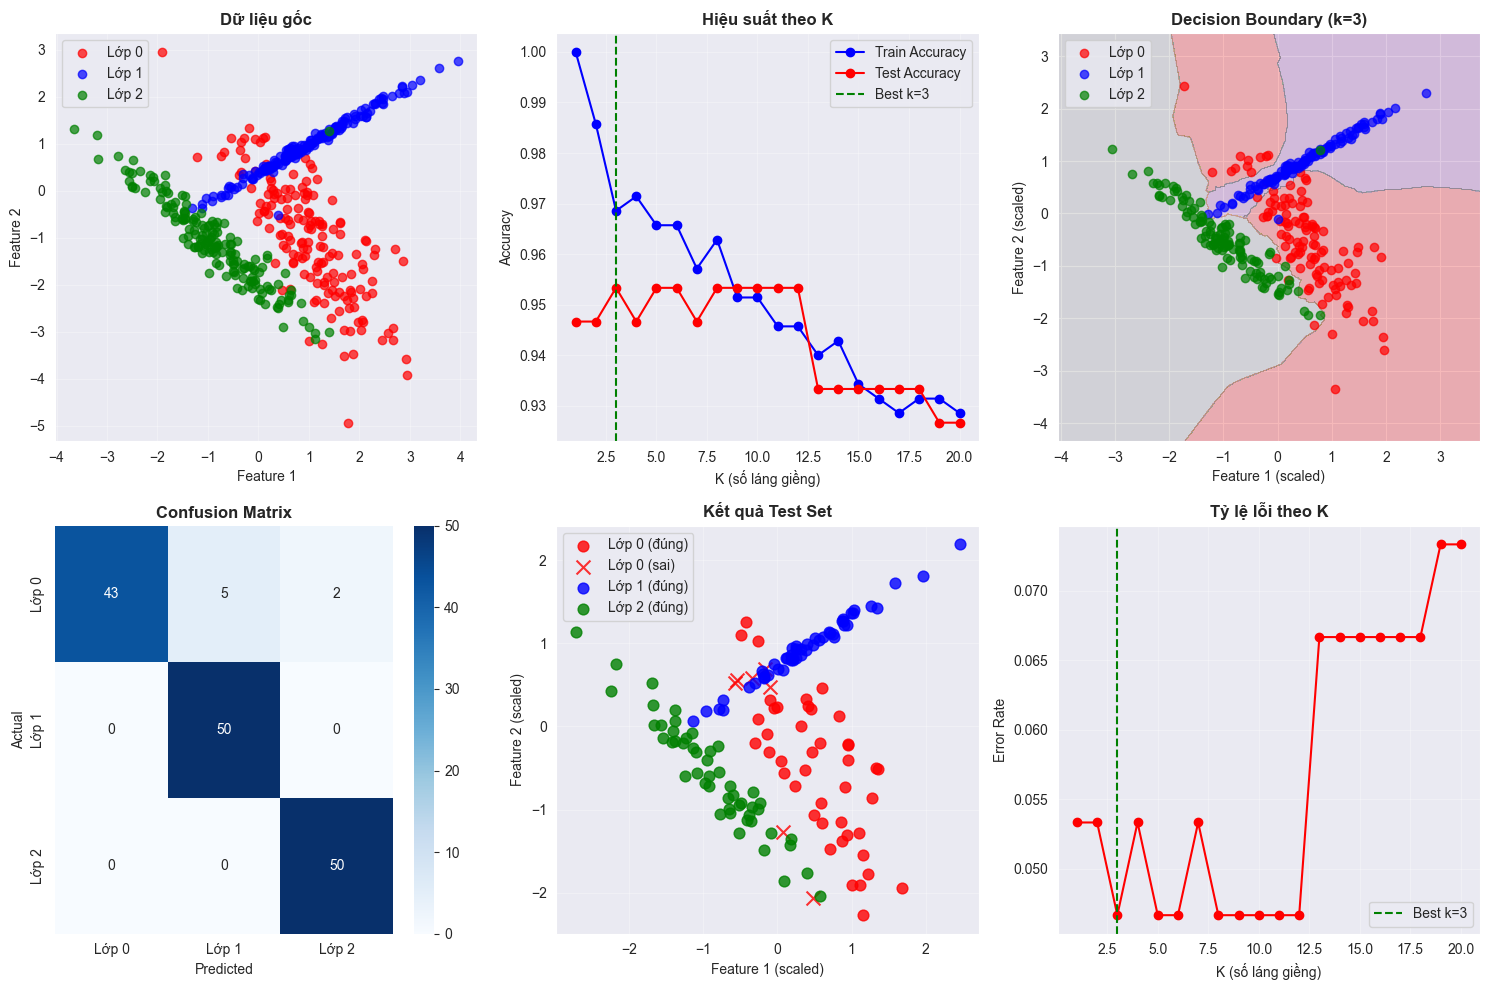


=== BÁO CÁO KẾT QUẢ (k=3) ===
Accuracy: 0.953

Classification Report:
              precision    recall  f1-score   support

       Lớp 0       1.00      0.86      0.92        50
       Lớp 1       0.91      1.00      0.95        50
       Lớp 2       0.96      1.00      0.98        50

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150


=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===

Mẫu 1: Thực tế=1, Dự đoán=1
  Láng giềng gần nhất: [1 1 1]
  Khoảng cách: [0.01103051 0.0440886  0.05107447]
  Phân bố lớp láng giềng: [0 3 0]

Mẫu 2: Thực tế=2, Dự đoán=2
  Láng giềng gần nhất: [2 2 2]
  Khoảng cách: [0.03499935 0.03510002 0.05878583]
  Phân bố lớp láng giềng: [0 0 3]

Mẫu 3: Thực tế=0, Dự đoán=0
  Láng giềng gần nhất: [0 0 0]
  Khoảng cách: [0.20512592 0.24822031 0.26832121]
  Phân bố lớp láng giềng: [3 0 0]

Mẫu 4: Thực tế=1, Dự đoán=1
  Láng giềng gần nhất: [1 1 1]
  Khoảng cách: [0.30457362

In [1]:
# ============== VÍ DỤ 1: KNN CLASSIFICATION VỚI DỮ LIỆU SINH NGẪU NHIÊN ==============
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Tạo dữ liệu phân loại
np.random.seed(42)
X, y = make_classification(
    n_samples=500,           # 500 mẫu
    n_features=2,            # 2 đặc trưng để dễ vẽ biểu đồ
    n_redundant=0,           # Không có đặc trưng thừa
    n_informative=2,         # 2 đặc trưng có ích
    n_clusters_per_class=1,  # 1 cụm cho mỗi lớp
    n_classes=3,             # 3 lớp
    random_state=42
)

print("=== VÍ DỤ 1: KNN CLASSIFICATION ===")
print(f"Số mẫu dữ liệu: {X.shape[0]}")
print(f"Số đặc trưng: {X.shape[1]}")
print(f"Số lớp: {len(np.unique(y))}")
print(f"Phân bố các lớp: {np.bincount(y)}")

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nSố mẫu train: {X_train.shape[0]}")
print(f"Số mẫu test: {X_test.shape[0]}")

# Thử nghiệm với các giá trị k khác nhau
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Tìm k tối ưu
best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

print(f"\nK tối ưu: {best_k}")
print(f"Độ chính xác tốt nhất: {best_accuracy:.3f}")

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))

# Subplot 1: Dữ liệu gốc
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Lớp {i}', alpha=0.7)
plt.title('Dữ liệu gốc', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Hiệu suất theo k
plt.subplot(2, 3, 2)
plt.plot(k_values, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(k_values, test_accuracies, 'ro-', label='Test Accuracy')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best k={best_k}')
plt.title('Hiệu suất theo K', fontsize=12, fontweight='bold')
plt.xlabel('K (số láng giềng)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Huấn luyện mô hình tối ưu
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

# Subplot 3: Decision boundary
plt.subplot(2, 3, 3)
h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
for i in range(3):
    mask = y_train == i
    plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], c=colors[i], label=f'Lớp {i}', alpha=0.7)
plt.title(f'Decision Boundary (k={best_k})', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()

# Subplot 4: Confusion Matrix
plt.subplot(2, 3, 4)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Lớp {i}' for i in range(3)],
            yticklabels=[f'Lớp {i}' for i in range(3)])
plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Subplot 5: Kết quả dự đoán
plt.subplot(2, 3, 5)
for i in range(3):
    mask_actual = y_test == i
    mask_correct = (y_test == y_pred) & (y_test == i)
    mask_wrong = (y_test != y_pred) & (y_test == i)

    if np.any(mask_correct):
        plt.scatter(X_test_scaled[mask_correct, 0], X_test_scaled[mask_correct, 1],
                   c=colors[i], marker='o', s=60, alpha=0.8, label=f'Lớp {i} (đúng)')
    if np.any(mask_wrong):
        plt.scatter(X_test_scaled[mask_wrong, 0], X_test_scaled[mask_wrong, 1],
                   c=colors[i], marker='x', s=100, alpha=0.8, label=f'Lớp {i} (sai)')

plt.title('Kết quả Test Set', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Phân tích lỗi
plt.subplot(2, 3, 6)
error_rates = [1 - acc for acc in test_accuracies]
plt.plot(k_values, error_rates, 'ro-')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best k={best_k}')
plt.title('Tỷ lệ lỗi theo K', fontsize=12, fontweight='bold')
plt.xlabel('K (số láng giềng)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Báo cáo chi tiết
print(f"\n=== BÁO CÁO KẾT QUẢ (k={best_k}) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Lớp {i}' for i in range(3)]))

# Phân tích một số dự đoán cụ thể
print(f"\n=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===")
for i in range(min(5, len(X_test))):
    distances, indices = best_knn.kneighbors([X_test_scaled[i]], n_neighbors=best_k)
    neighbors_classes = y_train[indices[0]]
    predicted_class = y_pred[i]
    actual_class = y_test[i]

    print(f"\nMẫu {i+1}: Thực tế={actual_class}, Dự đoán={predicted_class}")
    print(f"  Láng giềng gần nhất: {neighbors_classes}")
    print(f"  Khoảng cách: {distances[0]}")
    print(f"  Phân bố lớp láng giềng: {np.bincount(neighbors_classes, minlength=3)}")


=== VÍ DỤ 2: KNN REGRESSION - DỰ ĐOÁN GIÁ BẤT ĐỘNG SẢN ===
Dataset bất động sản:
     DienTich  SoPhongNgu  SoTang    TuoiNha  KhoangCachTrungTam  \
0   92.417854           2       1   8.360224            2.322980   
1   76.543392           2       1   0.615959            2.463315   
2   96.192213           3       1   3.766034            8.504895   
3  118.075746           3       1  13.029559           13.583223   
4   74.146166           1       3   4.545833            1.260761   

            Quan   LoaiNha       GiaBan  
0          Quan7  Chung cu  5443.570480  
1  QuanBinhThanh   Nha pho  5213.318889  
2          Quan3  Chung cu  6362.770211  
3          Quan3  Chung cu  7206.497048  
4          Quan7  Chung cu  4309.854351  

Số mẫu: 1000
Các cột: ['DienTich', 'SoPhongNgu', 'SoTang', 'TuoiNha', 'KhoangCachTrungTam', 'Quan', 'LoaiNha', 'GiaBan']

=== THỐNG KÊ MÔ TẢ ===
          DienTich   SoPhongNgu       SoTang      TuoiNha  KhoangCachTrungTam  \
count  1000.000000  1000.000000

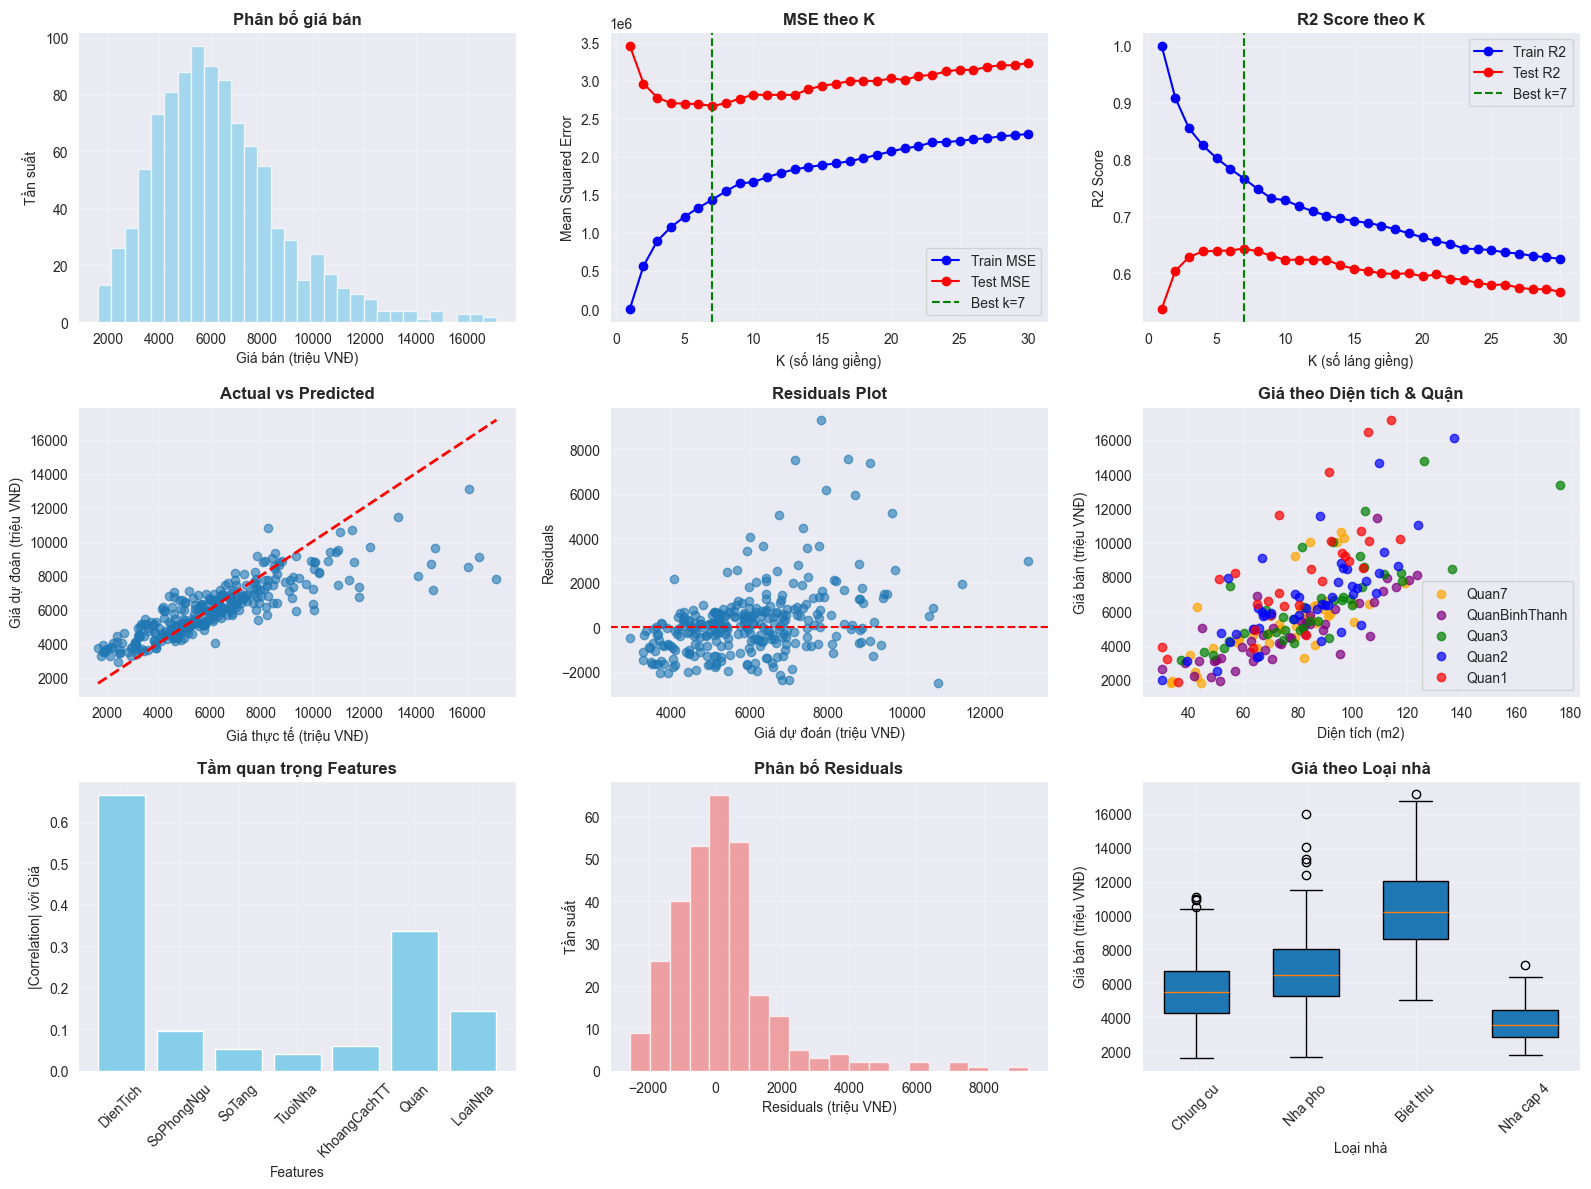


=== BÁO CÁO KẾT QUẢ REGRESSION (k=7) ===
R2 Score: 0.644
Mean Squared Error: 2667069.28
Root Mean Squared Error: 1633.12
Mean Absolute Error: 1060.83

=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===

Nhà 1:
  Thực tế: 6139 triệu VNĐ
  Dự đoán: 6492 triệu VNĐ
  Sai số: 352 triệu VNĐ (5.7%)
  Giá của 7 láng giềng gần nhất: [5945.6127954  5869.79305495 6570.102812   7639.78293066 7658.86924188
 6314.55181689 5442.47745485]
  Giá trung bình láng giềng: 6492 triệu VNĐ
  Chi tiết: 92m2, 2 phòng, Quan7, Chung cu

Nhà 2:
  Thực tế: 11817 triệu VNĐ
  Dự đoán: 7345 triệu VNĐ
  Sai số: 4472 triệu VNĐ (37.8%)
  Giá của 7 láng giềng gần nhất: [ 5605.41979355 11821.83477946  5729.92512743  3657.60005423
  3873.32553956  9402.79584053 11325.33317573]
  Giá trung bình láng giềng: 7345 triệu VNĐ
  Chi tiết: 77m2, 2 phòng, QuanBinhThanh, Nha pho

Nhà 3:
  Thực tế: 1922 triệu VNĐ
  Dự đoán: 3485 triệu VNĐ
  Sai số: 1563 triệu VNĐ (81.3%)
  Giá của 7 láng giềng gần nhất: [1965.03653824 3193.52512391 5557.97779875 2552.9148

In [2]:
# ============== VÍ DỤ 2: KNN REGRESSION VỚI DỮ LIỆU THỰC TẾ ==============
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Tạo dữ liệu bất động sản mô phỏng
np.random.seed(42)

# Tạo dữ liệu chi tiết hơn
n_samples = 1000
data = {
    'DienTich': np.random.normal(80, 25, n_samples),  # m2
    'SoPhongNgu': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.3, 0.35, 0.2, 0.05]),
    'SoTang': np.random.choice([1, 2, 3, 4], n_samples, p=[0.4, 0.35, 0.2, 0.05]),
    'TuoiNha': np.random.exponential(8, n_samples),  # năm
    'KhoangCachTrungTam': np.random.exponential(15, n_samples),  # km
    'Quan': np.random.choice(['Quan1', 'Quan2', 'Quan3', 'Quan7', 'QuanBinhThanh'], n_samples),
    'LoaiNha': np.random.choice(['Chung cu', 'Nha pho', 'Biet thu', 'Nha cap 4'], n_samples, p=[0.5, 0.3, 0.1, 0.1])
}

# Giới hạn các giá trị hợp lý
data['DienTich'] = np.clip(data['DienTich'], 30, 200)
data['TuoiNha'] = np.clip(data['TuoiNha'], 0, 50)
data['KhoangCachTrungTam'] = np.clip(data['KhoangCachTrungTam'], 1, 50)

# Tạo công thức tính giá phức tạp hơn
quan_multiplier = {'Quan1': 1.5, 'Quan2': 1.3, 'Quan3': 1.2, 'Quan7': 1.1, 'QuanBinhThanh': 1.0}
loai_multiplier = {'Chung cu': 1.0, 'Nha pho': 1.2, 'Biet thu': 1.8, 'Nha cap 4': 0.7}

gia_co_ban = (data['DienTich'] * 50 +
              data['SoPhongNgu'] * 200 +
              data['SoTang'] * 150 -
              data['TuoiNha'] * 20 -
              data['KhoangCachTrungTam'] * 10)

gia_dieu_chinh = []
for i in range(n_samples):
    gia = gia_co_ban[i] * quan_multiplier[data['Quan'][i]] * loai_multiplier[data['LoaiNha'][i]]
    gia += np.random.normal(0, 200)  # Thêm nhiễu
    gia_dieu_chinh.append(max(1000, gia))  # Giá tối thiểu 1000 triệu

data['GiaBan'] = gia_dieu_chinh

# Tạo DataFrame
df = pd.DataFrame(data)

print("=== VÍ DỤ 2: KNN REGRESSION - DỰ ĐOÁN GIÁ BẤT ĐỘNG SẢN ===")
print("Dataset bất động sản:")
print(df.head())
print(f"\nSố mẫu: {len(df)}")
print(f"Các cột: {list(df.columns)}")

# Thống kê mô tả
print(f"\n=== THỐNG KÊ MÔ TẢ ===")
print(df.describe())

# Xử lý dữ liệu categorical
le_quan = LabelEncoder()
le_loai = LabelEncoder()
df['Quan_encoded'] = le_quan.fit_transform(df['Quan'])
df['LoaiNha_encoded'] = le_loai.fit_transform(df['LoaiNha'])

# Chuẩn bị features và target
features = ['DienTich', 'SoPhongNgu', 'SoTang', 'TuoiNha', 'KhoangCachTrungTam', 'Quan_encoded', 'LoaiNha_encoded']
X = df[features].values
y = df['GiaBan'].values

print(f"\nFeatures sử dụng: {features}")

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

print(f"\nSố mẫu train: {X_train.shape[0]}")
print(f"Số mẫu test: {X_test.shape[0]}")

# Thử nghiệm với các giá trị k khác nhau
k_values = range(1, 31)
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)

    train_pred = knn_reg.predict(X_train_scaled)
    test_pred = knn_reg.predict(X_test_scaled)

    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))
    train_r2.append(r2_score(y_train, train_pred))
    test_r2.append(r2_score(y_test, test_pred))

# Tìm k tối ưu dựa trên R2 score
best_k = k_values[np.argmax(test_r2)]
best_r2 = max(test_r2)

print(f"\nK tối ưu: {best_k}")
print(f"R2 Score tốt nhất: {best_r2:.3f}")

# Vẽ biểu đồ
plt.figure(figsize=(16, 12))

# Subplot 1: Phân bố giá
plt.subplot(3, 3, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue')
plt.title('Phân bố giá bán', fontsize=12, fontweight='bold')
plt.xlabel('Giá bán (triệu VNĐ)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)

# Subplot 2: MSE theo k
plt.subplot(3, 3, 2)
plt.plot(k_values, train_mse, 'bo-', label='Train MSE')
plt.plot(k_values, test_mse, 'ro-', label='Test MSE')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best k={best_k}')
plt.title('MSE theo K', fontsize=12, fontweight='bold')
plt.xlabel('K (số láng giềng)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: R2 Score theo k
plt.subplot(3, 3, 3)
plt.plot(k_values, train_r2, 'bo-', label='Train R2')
plt.plot(k_values, test_r2, 'ro-', label='Test R2')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best k={best_k}')
plt.title('R2 Score theo K', fontsize=12, fontweight='bold')
plt.xlabel('K (số láng giềng)')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Huấn luyện mô hình tối ưu
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train_scaled, y_train)
y_pred = best_knn_reg.predict(X_test_scaled)

# Subplot 4: Actual vs Predicted
plt.subplot(3, 3, 4)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted', fontsize=12, fontweight='bold')
plt.xlabel('Giá thực tế (triệu VNĐ)')
plt.ylabel('Giá dự đoán (triệu VNĐ)')
plt.grid(True, alpha=0.3)

# Subplot 5: Residuals
plt.subplot(3, 3, 5)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot', fontsize=12, fontweight='bold')
plt.xlabel('Giá dự đoán (triệu VNĐ)')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

# Subplot 6: Phân bố theo quận
plt.subplot(3, 3, 6)
df_sample = df.sample(200, random_state=42)  # Lấy mẫu để vẽ
quan_colors = {'Quan1': 'red', 'Quan2': 'blue', 'Quan3': 'green', 'Quan7': 'orange', 'QuanBinhThanh': 'purple'}
for quan in df['Quan'].unique():
    mask = df_sample['Quan'] == quan
    plt.scatter(df_sample[mask]['DienTich'], df_sample[mask]['GiaBan'],
               c=quan_colors[quan], label=quan, alpha=0.7)
plt.title('Giá theo Diện tích & Quận', fontsize=12, fontweight='bold')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá bán (triệu VNĐ)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 7: Feature importance (correlation với giá)
plt.subplot(3, 3, 7)
correlations = []
feature_names = ['DienTich', 'SoPhongNgu', 'SoTang', 'TuoiNha', 'KhoangCachTT', 'Quan', 'LoaiNha']
for i, feature in enumerate(features):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(abs(corr))

bars = plt.bar(range(len(correlations)), correlations, color='skyblue')
plt.title('Tầm quan trọng Features', fontsize=12, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('|Correlation| với Giá')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 8: Phân bố lỗi
plt.subplot(3, 3, 8)
plt.hist(residuals, bins=20, alpha=0.7, color='lightcoral')
plt.title('Phân bố Residuals', fontsize=12, fontweight='bold')
plt.xlabel('Residuals (triệu VNĐ)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)

# Subplot 9: Comparison by property type
plt.subplot(3, 3, 9)
for loai in df['LoaiNha'].unique():
    mask = df['LoaiNha'] == loai
    plt.boxplot([df[mask]['GiaBan']], positions=[list(df['LoaiNha'].unique()).index(loai)],
                widths=0.6, patch_artist=True)
plt.title('Giá theo Loại nhà', fontsize=12, fontweight='bold')
plt.xlabel('Loại nhà')
plt.ylabel('Giá bán (triệu VNĐ)')
plt.xticks(range(len(df['LoaiNha'].unique())), df['LoaiNha'].unique(), rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Báo cáo chi tiết
print(f"\n=== BÁO CÁO KẾT QUẢ REGRESSION (k={best_k}) ===")
print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

# Phân tích một số dự đoán cụ thể
print(f"\n=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===")
for i in range(min(5, len(X_test))):
    distances, indices = best_knn_reg.kneighbors([X_test_scaled[i]], n_neighbors=best_k)
    neighbors_prices = y_train[indices[0]]
    predicted_price = y_pred[i]
    actual_price = y_test[i]

    print(f"\nNhà {i+1}:")
    print(f"  Thực tế: {actual_price:.0f} triệu VNĐ")
    print(f"  Dự đoán: {predicted_price:.0f} triệu VNĐ")
    print(f"  Sai số: {abs(actual_price - predicted_price):.0f} triệu VNĐ ({abs(actual_price - predicted_price)/actual_price*100:.1f}%)")
    print(f"  Giá của {best_k} láng giềng gần nhất: {neighbors_prices}")
    print(f"  Giá trung bình láng giềng: {neighbors_prices.mean():.0f} triệu VNĐ")

    # Thông tin chi tiết về ngôi nhà
    original_idx = X_test.shape[0] - len(X_test) + i  # Tìm index gốc
    if original_idx < len(df):
        house_info = df.iloc[original_idx]
        print(f"  Chi tiết: {house_info['DienTich']:.0f}m2, {house_info['SoPhongNgu']} phòng, "
              f"{house_info['Quan']}, {house_info['LoaiNha']}")

# So sánh hiệu suất với Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print(f"\n=== SO SÁNH VỚI LINEAR REGRESSION ===")
print(f"KNN R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Linear Regression R2 Score: {r2_score(y_test, lr_pred):.3f}")
print(f"KNN RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")
